# Day 15 Group Worksheet
Oct 27, 2025

If you're working on CoCalc, it's good to rename your notebook with a fun group name and to include your names below so that you can easily find it later for reference.

* Group members:

## *Plinko*

Plinko is a game from the game show The Price is Right where a puck is placed into the top of a board with pegs in it. As the puck falls down the board, it hits the pegs and shifts to the right or the left with equal probability. Traditionally, If the puck hits the edge of the board, a bumper pushes it back to the last spot again. There are buckets at the bottom of the board for the puck to fall into with various prizes. But you can also play Plinko with a triangular board so the puck can never fall out 

## *Task 1: Triangular Plinko*

![Triangular Plinko](https://i.ibb.co/28pGMgb/triangular-plinko.png)

Use a Monte-Carlo simulation to simulate what happens on a Triangular Plinko board with 9 buckets, as shown above (image captured from https://phet.colorado.edu/sims/html/plinko-probability/latest/plinko-probability_en.html). 
1. Create a final bar chart (`plt.bar()`) or histogram (`plt.hist()`) that shows how many times the puck falls into each of the final bins. See some example code for each type of chart below.
2. As a comparison to your random data, add the expected results to your plot., which should be based on binomial distribution.

## *Task 2: Rectangular Plinko, with bumpers*
In The Price is Right version of Plinko, the board is rectangular in shape, with 9 possible start positions and 9 buckets. It uses bumpers on the walls so that for certain positions along the wall, the puck only has one choice of path instead of two, as shown below (image captured from https://games.washingtonpost.com/games/price-is-right-plinko)

![Plinko](https://i.ibb.co/sqqpg9G/plinko.png)

There are 9 possible starting positions, based on the spaces in-between adjacent pegs in the top row, and the left-most or right-most pegs and the wall. After passing through this first row of pegs (where no randomness has yet happened), the puck will encounter 12 subsequent rows of pegs where randomness will occur.

Build your Monte-Carlo simulation so that you can choose any starting position and then run $N$ simulations:

1. Create a final bar graph of histogram showing how many times the puck falls into each bin. Show the results for at least three different starting positions. 
   * Alternatively, build a heat map showing the frequency at which the puck falls into each final bin, based on the starting bin
2. Calculate the expectation value (average winnings) for each possible starting position. Express this using a visualization or print statements.

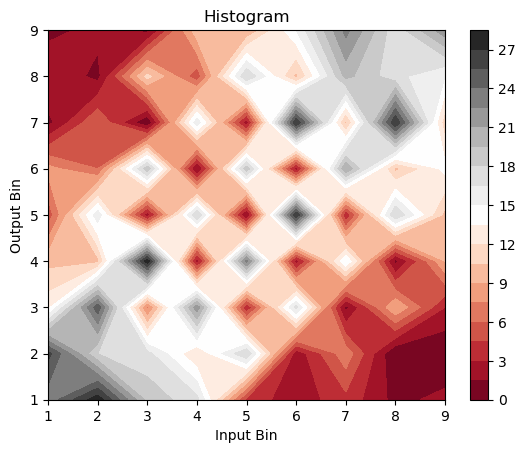

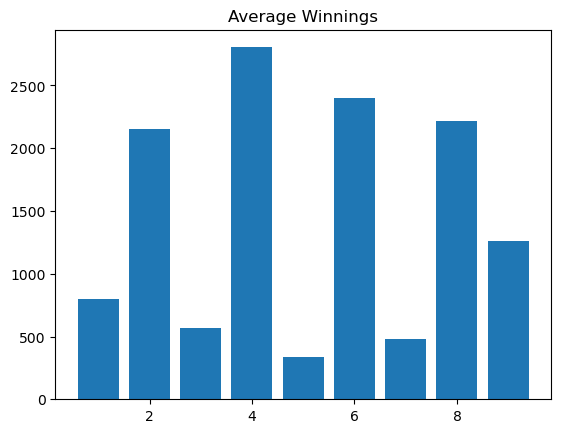

In [13]:
import numpy as np
from matplotlib import pyplot as plt

BINS     = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
WINNINGS = np.array([100, 500, 1000, 0, 10000, 0, 1000, 500, 100])
#np.random.seed(0)

def get_end(start):
    pos = start
    for row in range(1,12):
        pos += np.random.choice([-1,1])
        pos = np.clip(pos, 1, 9)
    return pos

def contour(n):
    
    contour = []
    for start in BINS:
        hist = [0] * 9
        for i in range(n):
            end = get_end(start)
            hist[end-1] += 1
        contour.append(hist)
    contour = np.asarray(contour)
    Z = contour
    
    X, Y = np.meshgrid(BINS, BINS)

    plt.figure()
    plt.contourf(X, Y, Z, 20, cmap='RdGy')
    plt.xlabel('Input Bin')
    plt.ylabel('Output Bin')
    plt.title('Histogram')
    plt.colorbar()
    
    avg_winnings = contour @ WINNINGS / n
    
    plt.figure()
    plt.bar(BINS, avg_winnings)
    plt.title('Average Winnings')
    plt.show()
    
contour(100)

# Bar chart and histogram examples

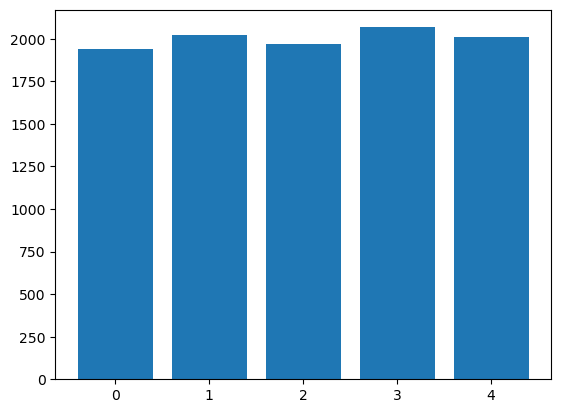

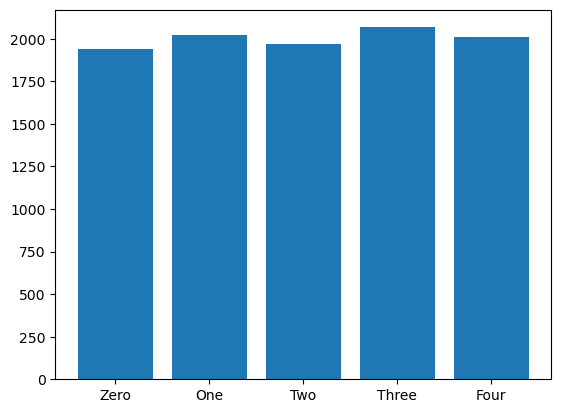

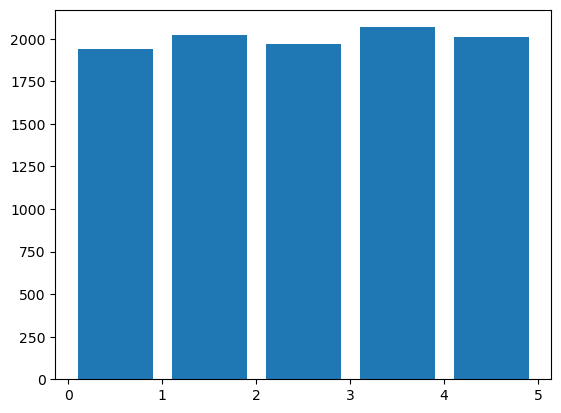

In [1]:
# Bar chart and histogram examples
import numpy as np
import matplotlib.pyplot as plt

# 10,000 random numbers from 0-4, inclusive
randos = np.random.randint(0, 5, size=10000)

### Plot 1: Bar chart

# Find out how many counts happened for each value 0-4
bins, counts = np.unique(randos, return_counts=True)

# Bar chart with
# - bins specifying the names of each bin
# - counts specifying how tall the bar should be for each bin
plt.bar(bins, counts)
plt.show()

### Plot 2: Bar chart with string names

bin_names = ['Zero', 'One', 'Two', 'Three', 'Four']
plt.bar(bin_names, counts)
plt.show()

### Plot 3: Histogram with bins specified

# In a histogram, bins are defined by the intervals between the edeges. Convetion:
#  • [left, right) - includes the left edge, excludes the right edge
#  • Exception: The rightmost bin is [left, right] - closed on both ends
# So we need to include bin edges out to 5, e.g., 'bins=range(6)'

plt.hist(randos, bins=range(6), rwidth=0.8)
plt.show()